In [2]:
import pandas as pd
import spacy

In [8]:
df = pd.read_csv('./data/train.csv')

In [9]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation why the edits made under my userna...,0,0,0,0,0,0
1,d aww he matches this background colour i am s...,0,0,0,0,0,0
2,hey man i am really not trying to edit war it ...,0,0,0,0,0,0
3,more i can not make any real suggestions on im...,0,0,0,0,0,0
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0


In [16]:
nlp = spacy.load("en_core_web_sm")

In [11]:
df_test = pd.read_csv('./data/test.csv')

In [12]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule is more succesful then you wi...
1,0000247867823ef7,from rfc the title is fine as it is imo
2,00013b17ad220c46,sources zawe ashton on lapland
3,00017563c3f7919a,if you have a look back at the source the info...
4,00017695ad8997eb,i do not anonymously edit articles at all


In [13]:
df_labels = pd.read_csv('./data/test_labels.csv')
df_labels.drop(columns=['id'], inplace=True)

In [14]:
df_labels.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1,-1
2,-1,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1,-1
4,-1,-1,-1,-1,-1,-1


In [15]:
frames = [df_test, df_labels]
df_test_final = pd.concat(frames, axis=1)

In [16]:
df_test_final

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,yo bitch ja rule is more succesful then you wi...,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,from rfc the title is fine as it is imo,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,sources zawe ashton on lapland,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,if you have a look back at the source the info...,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,i do not anonymously edit articles at all,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,i totally agree this stuff is nothing but too ...,-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,throw from out field to home plate does it get...,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,okinotorishima categories i see your changes a...,-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,one of the founding nations of the eu germany ...,-1,-1,-1,-1,-1,-1


In [17]:
def filter_rows_by_values(df, col, values):
    return df[~df[col].isin(values)]

In [18]:
df_test_cleaned = filter_rows_by_values(df_test_final, "toxic", [-1])

In [19]:
df_test_cleaned

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,thank you for understanding i think very highl...,0,0,0,0,0,0
7,000247e83dcc1211,dear god this site is horrible,0,0,0,0,0,0
11,0002f87b16116a7f,somebody will invariably try to add religion r...,0,0,0,0,0,0
13,0003e1cccfd5a40a,it says it right there that it is a type the t...,0,0,0,0,0,0
14,00059ace3e3e9a53,before adding a new product to the list make s...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
153150,fff8f64043129fa2,jerome i see you never got around to this i m ...,0,0,0,0,0,0
153151,fff9d70fe0722906,lucky bastard http wikimediafoundation org wik...,0,0,0,0,0,0
153154,fffa8a11c4378854,shame on you all you want to speak about gays ...,0,0,0,0,0,0
153155,fffac2a094c8e0e2,mel gibson is a nazi bitch who makes shitty mo...,1,0,1,0,1,0


In [20]:
df_test_cleaned.to_csv('test_final.csv', index=False)

In [21]:
df_test_cleaned.reset_index(inplace=True)

In [22]:
df_test_cleaned.drop(columns=["index", "id"], inplace=True)

/Users/franciscovarelacid/opt/anaconda3/envs/nlpmod/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
df_test_cleaned

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,thank you for understanding i think very highl...,0,0,0,0,0,0
1,dear god this site is horrible,0,0,0,0,0,0
2,somebody will invariably try to add religion r...,0,0,0,0,0,0
3,it says it right there that it is a type the t...,0,0,0,0,0,0
4,before adding a new product to the list make s...,0,0,0,0,0,0
...,...,...,...,...,...,...,...
63973,jerome i see you never got around to this i m ...,0,0,0,0,0,0
63974,lucky bastard http wikimediafoundation org wik...,0,0,0,0,0,0
63975,shame on you all you want to speak about gays ...,0,0,0,0,0,0
63976,mel gibson is a nazi bitch who makes shitty mo...,1,0,1,0,1,0


In [24]:
df_test_cleaned.to_csv('test_final.csv', index=False)

In [25]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test_final.csv')

In [27]:

df_train.to_csv('train.csv', index=False)

In [14]:
def preprocessing(sentence):
    doc = nlp(sentence)
    tokens = [token.lemma_ for token in doc if not token.is_punct and not token.is_stop]
    return tokens

In [ ]:
def token_encoder(token, vec):
    if token == "<pad>":
        return 1
    else:
        try:
            return vec.stoi[token]
        except:
            return 0

def encoder(tokens, vec):
    return [token_encoder(token, vec) for token in tokens]

def padding(list_of_indexes, max_seq_len, padding_index=1):
    output = list_of_indexes + (max_seq_len - len(list_of_indexes))*[padding_index]
    return output[:max_seq_len]

In [3]:
import torch
from collections import Counter
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm, tqdm_notebook
from torchtext.vocab import FastText

In [30]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test_final.csv')

In [20]:
fasttext = FastText("simple")

In [10]:
def token_encoder(token, vec):
    if token == "<pad>":
        return 1
    else:
        try:
            return vec.stoi[token]
        except:
            return 0

def encoder(tokens, vec):
    return [token_encoder(token, vec) for token in tokens]

def padding(list_of_indexes, max_seq_len, padding_index=1):
    output = list_of_indexes + (max_seq_len - len(list_of_indexes))*[padding_index]
    return output[:max_seq_len]

In [33]:
# list_tokens = []
# for i in range(63977):
#     encoder(preprocessing(df_test_cleaned["comment_text"][i]), fasttext).append(list_tokens)

In [36]:
df_test_cleaned

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,thank you for understanding i think very highl...,0,0,0,0,0,0
1,dear god this site is horrible,0,0,0,0,0,0
2,somebody will invariably try to add religion r...,0,0,0,0,0,0
3,it says it right there that it is a type the t...,0,0,0,0,0,0
4,before adding a new product to the list make s...,0,0,0,0,0,0
...,...,...,...,...,...,...,...
63973,jerome i see you never got around to this i m ...,0,0,0,0,0,0
63974,lucky bastard http wikimediafoundation org wik...,0,0,0,0,0,0
63975,shame on you all you want to speak about gays ...,0,0,0,0,0,0
63976,mel gibson is a nazi bitch who makes shitty mo...,1,0,1,0,1,0


In [40]:
df_test_cleaned

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,thank you for understanding i think very highl...,0,0,0,0,0,0
1,dear god this site is horrible,0,0,0,0,0,0
2,somebody will invariably try to add religion r...,0,0,0,0,0,0
3,it says it right there that it is a type the t...,0,0,0,0,0,0
4,before adding a new product to the list make s...,0,0,0,0,0,0
...,...,...,...,...,...,...,...
63973,jerome i see you never got around to this i m ...,0,0,0,0,0,0
63974,lucky bastard http wikimediafoundation org wik...,0,0,0,0,0,0
63975,shame on you all you want to speak about gays ...,0,0,0,0,0,0
63976,mel gibson is a nazi bitch who makes shitty mo...,1,0,1,0,1,0


In [41]:
df_test_cleaned.reset_index(inplace=True)

In [43]:
df_test_cleaned.drop(columns=['index'], inplace=True)

/Users/franciscovarelacid/opt/anaconda3/envs/nlpmod/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [44]:
df_test_cleaned

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,thank you for understanding i think very highl...,0,0,0,0,0,0
1,dear god this site is horrible,0,0,0,0,0,0
2,somebody will invariably try to add religion r...,0,0,0,0,0,0
3,it says it right there that it is a type the t...,0,0,0,0,0,0
4,before adding a new product to the list make s...,0,0,0,0,0,0
...,...,...,...,...,...,...,...
59407,jerome i see you never got around to this i m ...,0,0,0,0,0,0
59408,lucky bastard http wikimediafoundation org wik...,0,0,0,0,0,0
59409,shame on you all you want to speak about gays ...,0,0,0,0,0,0
59410,mel gibson is a nazi bitch who makes shitty mo...,1,0,1,0,1,0


In [45]:
test_df = df_test_cleaned.iloc[:20000]

In [46]:
train_df = train_df.iloc[:50000]

In [ ]:
del sequences[]

63951

In [62]:
test_df["comment_text"][6493]

'சம யல ல க ட ந ம க ய கற கள ம ற ற சம பத ல ல க ரணம ச வ ம ற வ ட ம என பதற க க ஆன ல ம ழ என ற வந த வ ட ட ல morning என ன ச ப ப ட ர ம ப bore அட க க த என க ற ம இன ற ய ச ற வர கள க க ந ற க ல ம ச ப ன றவ ஆங க லத த ல த ர ய ம தவ ர த ய ம ழ ய ன நம தம ழ ல அல ல அங க லத த ந ன எத ர க க வ ல ல என தம ழ ம ழ ய ந ன ந ச க ன ற ன ஒர ஆய வ ல இன ன ம வர டங கள ல நம தம ழ ம ழ அழ ந த வ ட ம என க ற ர கள ப ர ள கள ன ம ல உள ள அக கற நம ம ழ ன ம ல இல ல என பத வர ந த வ க க றத மற ற ம ழ கள ல ப ச வத தவறல ல ந ம தம ழ ம ழ ய ப ச ங கள அங க லம கலக க மல தம ழ ல ப ச வ ம தம ழ ய ம ப ச வ ம அங க லம கலக க மல ந ம ந ம ம ழ க க க ல ல வ ப பத க ட ரம தம ழன என ற ச ல வ ம தல ந ம ர த த ந ற ப ம தம ழ ல ப ச வ ம தம ழ ய ம ப ச வ ம வ ழ க தம ழ வளர க தம ழ என ற ம அழ ய மல ந ட ட வ ழ க வளர க'

20000

In [65]:
test_df.drop(columns=['index'], inplace=True)

/Users/franciscovarelacid/opt/anaconda3/envs/nlpmod/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [66]:
test_df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,thank you for understanding i think very highl...,0,0,0,0,0,0
1,dear god this site is horrible,0,0,0,0,0,0
2,somebody will invariably try to add religion r...,0,0,0,0,0,0
3,it says it right there that it is a type the t...,0,0,0,0,0,0
4,before adding a new product to the list make s...,0,0,0,0,0,0
...,...,...,...,...,...,...,...
19995,actually i did not see it just another stomped...,0,0,0,0,0,0
19996,you could be right maybe seconds is possible w...,0,0,0,0,0,0
19997,timeline of paranormal fringe and pseudoscienc...,0,0,0,0,0,0
19998,it christmas eve and i have only wrapped two f...,1,0,1,0,1,0


In [76]:
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector


In [78]:
def get_lang_detector(nlp, name):
    return LanguageDetector()

nlp = spacy.load("en_core_web_sm")
Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)

ValueError: [E004] Can't set up pipeline component: a factory for 'language_detector' already exists. Existing factory: <function get_lang_detector at 0x7f8308c97280>. New factory: <function get_lang_detector at 0x7f8308c97d30>

In [82]:
text = 'சம யல ல க ட ந ம க ய கற கள ம ற ற சம பத ல ல க ரணம'
doc = nlp(text)
print(doc._.language['language'])

ta


In [88]:
##### Droping non Engilsh Rows #####

def clean_non_en(dataf):
    list_index = []
    for i in range(len(dataf)):
        if (nlp(dataf["comment_text"][i])._.language['language'] != 'en'):
            list_index.append(i)
    return list_index

In [101]:
train_df.reset_index(inplace=True)

,index,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,explanation why the edits made under my userna...,0,0,0,0,0,0
1,1,d aww he matches this background colour i am s...,0,0,0,0,0,0
2,2,hey man i am really not trying to edit war it ...,0,0,0,0,0,0
3,3,more i can not make any real suggestions on im...,0,0,0,0,0,0
4,4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
46179,49994,redirect user talk soap archive,0,0,0,0,0,0
46180,49996,there was also an atlantis wrap back in maybe ...,0,0,0,0,0,0
46181,49997,i have removed the various references as a use...,0,0,0,0,0,0
46182,49998,re removal of templates i would be most gratef...,1,0,0,0,1,0


In [21]:
def clean_floats_long(dataf):
    list_index = []
    for i in range(len(dataf)):
        if (type(dataf["comment_text"][i]) == float) or (len(encoder(dataf["comment_text"][i], fasttext)) > 1000):
            list_index.append(i)
    dataf.drop(list_index, inplace=True)
    dataf.reset_index(inplace=True)
    dataf.drop(columns=['index'], inplace=True)
    return dataf
train_df = clean_floats_long(train_df)
test_df = clean_floats_long(test_df)

In [23]:
test_df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,thank you for understanding i think very highl...,0,0,0,0,0,0
1,dear god this site is horrible,0,0,0,0,0,0
2,somebody will invariably try to add religion r...,0,0,0,0,0,0
3,it says it right there that it is a type the t...,0,0,0,0,0,0
4,before adding a new product to the list make s...,0,0,0,0,0,0
...,...,...,...,...,...,...,...
19995,actually i did not see it just another stomped...,0,0,0,0,0,0
19996,you could be right maybe seconds is possible w...,0,0,0,0,0,0
19997,timeline of paranormal fringe and pseudoscienc...,0,0,0,0,0,0
19998,it christmas eve and i have only wrapped two f...,1,0,1,0,1,0


In [104]:
train_df.drop(lst_to_delete, inplace=True)

In [91]:
list_to_delete = clean_non_en(test_df)

In [107]:
train_to_delete = clean_non_en(train_df)

In [108]:
test_df.drop(list_to_delete, inplace=True)
train_df.drop(train_to_delete, inplace=True)

/Users/franciscovarelacid/opt/anaconda3/envs/nlpmod/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [121]:
train_df.reset_index(inplace=True)

In [123]:
train_df.drop(columns=['index'], inplace=True)

In [126]:
train_df.to_csv('f_train_df.csv', index=False)

In [5]:
train_df = pd.read_csv('./data/train_df.csv')
test_df = pd.read_csv('./data/test_df.csv')

In [130]:
sequences = [encoder(preprocessing(sequence), fasttext) for sequence in train_df.comment_text.tolist()]

[[4228,
  539,
  3513,
  5161,
  11748,
  3190,
  4714,
  1321,
  7497,
  1179,
  940,
  53,
  167,
  7971,
  26376,
  1879,
  321,
  49,
  102,
  9164],
 [61, 92965, 810, 537, 1834, 14592, 6475, 1903, 49, 132, 42],
 [5638,
  343,
  895,
  539,
  124,
  2577,
  6486,
  1879,
  3945,
  401,
  49,
  539,
  608,
  49,
  102,
  1379,
  5232,
  2352,
  2660],
 [698,
  5873,
  5189,
  3637,
  746,
  24060,
  185,
  28721,
  360,
  2387,
  229,
  1446,
  338,
  26795,
  3454,
  1548,
  4928,
  555,
  1548,
  972,
  185,
  9890,
  1548,
  165,
  1446,
  487,
  832,
  408,
  1438,
  15558,
  130,
  1363,
  3676,
  8914,
  15234,
  1529,
  179,
  3945,
  410,
  9205,
  212,
  0,
  1156],
 [1230, 2327, 1992, 2184, 102],
 [0, 125, 2089, 49],
 [0, 45048, 176],
 [1321, 3203, 0, 130, 4714, 2425],
 [1939,
  392,
  7976,
  3843,
  13041,
  971,
  130,
  10615,
  3424,
  1321,
  7292,
  456,
  7191,
  125,
  257,
  1446,
  10848,
  5285,
  102,
  2394,
  412,
  1093,
  5285,
  465,
  21677,
  130,
  631

In [132]:
len(sequences)

44749

In [131]:
import numpy as np
def find_max_list_idx(list):
    list_len = [len(i) for i in list]
    return np.argmax(np.array(list_len))

find_max_list_idx(sequences), len(sequences[find_max_list_idx(sequences)])

(33771, 150)

In [133]:
sequences_test = [encoder(preprocessing(sequence), fasttext) for sequence in test_df.comment_text.tolist()]

In [134]:
find_max_list_idx(sequences_test), len(sequences_test[find_max_list_idx(sequences_test)])

(12875, 152)

In [135]:
def find_average_list_idx(list):
    counter = 0
    for i in list:
        counter += len(i)
    average = counter/len(list)
    return average

In [136]:
find_average_list_idx(sequences)

20.638181858812487

In [137]:
find_average_list_idx(sequences_test)

20.137687366167025

In [8]:
def padding(list_of_indexes, max_seq_len, padding_index=1):
    output = list_of_indexes + (max_seq_len - len(list_of_indexes))*[padding_index]
    return output[:max_seq_len]

In [289]:
train_exp_df = train_df[:1000]
test_exp_df = test_df[:100]

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,thank you for understanding i think very highl...,0,0,0,0,0,0
1,dear god this site is horrible,0,0,0,0,0,0
2,somebody will invariably try to add religion r...,0,0,0,0,0,0
3,it says it right there that it is a type the t...,0,0,0,0,0,0
4,before adding a new product to the list make s...,0,0,0,0,0,0
...,...,...,...,...,...,...,...
18675,actually i did not see it just another stomped...,0,0,0,0,0,0
18676,you could be right maybe seconds is possible w...,0,0,0,0,0,0
18677,timeline of paranormal fringe and pseudoscienc...,0,0,0,0,0,0
18678,it christmas eve and i have only wrapped two f...,1,0,1,0,1,0


In [6]:
class TrainData(Dataset):
    def __init__(self, df, max_seq_len=150): # df is the input df, max_seq_len is the max lenght allowed to a sentence before cutting or padding
        self.max_seq_len = max_seq_len
        
        counter = Counter()
        train_iter = iter(df.comment_text.values)
        self.vec = FastText("simple")
        self.vec.vectors[1] = -torch.ones(self.vec.vectors[1].shape[0]) # replacing the vector associated with 1 (padded value) to become a vector of -1.
        self.vec.vectors[0] = torch.zeros(self.vec.vectors[0].shape[0]) # replacing the vector associated with 0 (unknown) to become zeros
        self.vectorizer = lambda x: self.vec.vectors[x]
        self.label_toxic = df.toxic
        self.label_stoxic = df.severe_toxic
        self.label_obscene = df.obscene
        self.label_threat = df.threat
        self.label_insult = df.insult
        self.label_ihate = df.identity_hate
        sequences = [padding(encoder(preprocessing(sequence), self.vec), max_seq_len) for sequence in df.comment_text.tolist()]
        self.sequences = sequences
    
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, i):
        assert len(self.sequences[i]) == self.max_seq_len
        return self.sequences[i], self.label_toxic[i], self.label_stoxic[i], self.label_obscene[i], self.label_threat[i], self.label_insult[i], self.label_ihate[i]

In [24]:
train_dataset = TrainData(train_df, max_seq_len=150)

In [ ]:
test_dataset = TrainData(test_df, max_seq_len=150)

In [ ]:
def structure_dataset(dataset):
    com_array = []
    labs_array = []
    for i in range(len(dataset)):
        com_array.append(dataset[i][0])
        lab_array = []
        for j in range(1,7):
            lab_array.append(dataset[i][j])
        labs_array.append(lab_array)
    return np.array(com_array), np.array(labs_array)

In [ ]:
train_dataset = structure_dataset(train_dataset)
test_dataset = structure_dataset(test_dataset)

NameError: name 'structure_dataset' is not defined

In [ ]:
x_train, y_train = train_dataset[0], train_dataset[1]
x_test, y_test = test_dataset[0], test_dataset[1]

array([[ 4228,   539,  3513, ...,     1,     1,     1],
       [   61, 92965,   810, ...,     1,     1,     1],
       [ 5638,   343,   895, ...,     1,     1,     1],
       ...,
       [ 1903,  1903,  4714, ...,     1,     1,     1],
       [ 2722, 13946,   412, ...,     1,     1,     1],
       [ 2466,   136,   340, ...,     1,     1,     1]])

In [ ]:
class BinaryDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, index):
        features = self.x[index, :]
        labels = self.y[index, :]
        
        # we have 12 feature columns 
        features = torch.tensor(features, dtype=torch.float32)
        # there are 5 classes and each class can have a binary value ...
        # ... either 0 or 1
        label1 = torch.tensor(labels[0], dtype=torch.float32)
        label2 = torch.tensor(labels[1], dtype=torch.float32)
        label3 = torch.tensor(labels[2], dtype=torch.float32)
        label4 = torch.tensor(labels[3], dtype=torch.float32)
        label5 = torch.tensor(labels[4], dtype=torch.float32)
        label6 = torch.tensor(labels[5], dtype=torch.float32)

        return {
            'features': features,
            'toxic': label1,
            'severe_toxic': label2,
            'obscene': label3,
            'threat': label4,
            'insult': label5,
            'identity_hate': label6,
        }

In [ ]:
bin_dataset = BinaryDataset(x_train, y_train)

In [ ]:
bin_test_dataset = BinaryDataset(x_test, y_test)

In [ ]:
len(x_test)

18680

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
###### For the models.py file ######

class MultiHeadBinaryModel(nn.Module):
    def __init__(self):
        super(MultiHeadBinaryModel, self).__init__()
        self.fc1 = nn.Linear(150, 32) # 12 is the number of features
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 128)
        self.fc4 = nn.Linear(128, 256)
        
        # we will treat each head as a binary classifier ...
        # ... so the output features will be 1
        self.out1 = nn.Linear(256, 1)
        self.out2 = nn.Linear(256, 1)
        self.out3 = nn.Linear(256, 1)
        self.out4 = nn.Linear(256, 1)
        self.out5 = nn.Linear(256, 1)
        self.out6 = nn.Linear(256, 1)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        
        # each binary classifier head will have its own output
        out1 = F.sigmoid(self.out1(x))
        out2 = F.sigmoid(self.out2(x))
        out3 = F.sigmoid(self.out3(x))
        out4 = F.sigmoid(self.out4(x))
        out5 = F.sigmoid(self.out5(x))
        out6 = F.sigmoid(self.out6(x))
        
        return out1, out2, out3, out4, out5, out6

In [ ]:
import torch.nn as nn

def binary_loss_fn(outputs, targets):
    o1, o2, o3, o4, o5, o6 = outputs
    t1, t2, t3, t4, t5, t6 = targets
    l1 = nn.BCELoss()(o1, t1)
    l2 = nn.BCELoss()(o2, t2)
    l3 = nn.BCELoss()(o3, t3)
    l4 = nn.BCELoss()(o4, t4)
    l5 = nn.BCELoss()(o5, t5)
    l6 = nn.BCELoss()(o6, t6)
    return (l1 + l2 + l3 + l4 + l5 + l6) / 6


In [ ]:
from tqdm import tqdm
import torch.optim as optim
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')



bin_train_dataset = BinaryDataset(x_train, y_train)
train_dataloader = DataLoader(bin_train_dataset, shuffle=True, batch_size=1024)

# initialize the model
model = MultiHeadBinaryModel()

# training function
def train(model, dataloader, optimizer, loss_fn, train_dataset, device):
    model.train()
    counter = 0
    train_running_loss = 0.0
    for i, data in tqdm(enumerate(dataloader), total=int(len(train_dataset)/dataloader.batch_size)):
        counter += 1
        
        # extract the features and labels
        features = data['features'].to(device)
        target1 = data['toxic'].to(device)
        target2 = data['severe_toxic'].to(device)
        target3 = data['obscene'].to(device)
        target4 = data['threat'].to(device)
        target5 = data['insult'].to(device)
        target6 = data['identity_hate'].to(device)
        
        # zero-out the optimizer gradients
        optimizer.zero_grad()
        
        outputs = model(features)
        targets = (target1, target2, target3, target4, target5, target6)
        loss = loss_fn(outputs, targets)
        train_running_loss += loss.item()
        
        # backpropagation
        loss.backward()
        # update optimizer parameters
        optimizer.step()
        
    train_loss = train_running_loss / counter
    return train_loss

# learning parameters
optimizer = optim.Adam(params=model.parameters(), lr=0.001)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
epochs = 50
# load the model on to the computation device
model.to(device)


# start the training
train_loss = []
for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss = train(
        model, train_dataloader, optimizer, binary_loss_fn, bin_train_dataset, device
    )
    train_loss.append(train_epoch_loss)
    print(f"Train Loss: {train_epoch_loss:.4f}")
torch.save(model.state_dict(), 'outputs/multi_head_binary.pth')


[INFO]: Number of training samples: 44749
[INFO]: Number of training features: 150
Epoch 1 of 50


  0%|          | 0/43 [00:00<?, ?it/s]/Users/franciscovarelacid/opt/anaconda3/envs/nlpmod/lib/python3.8/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/franciscovarelacid/opt/anaconda3/envs/nlpmod/lib/python3.8/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([1024])) that is different to the input size (torch.Size([1024, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
100%|██████████| 43/43 [00:05<00:00,  7.32it/s]/Users/franciscovarelacid/opt/anaconda3/envs/nlpmod/lib/python3.8/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([717])) that is different to the input size (torch.Size([717, 1])) is deprecated. Please ensure they have the same size.

Train Loss: 1.7249
Epoch 2 of 50


44it [00:05,  7.95it/s]


Train Loss: 1.3266
Epoch 3 of 50


44it [00:04,  8.80it/s]


Train Loss: 1.2954
Epoch 4 of 50


44it [00:04,  9.30it/s]


Train Loss: 0.9099
Epoch 5 of 50


44it [00:04,  9.56it/s]                        


Train Loss: 0.4064
Epoch 6 of 50


44it [00:04,  9.69it/s]


Train Loss: 0.3046
Epoch 7 of 50


44it [00:04,  9.85it/s]


Train Loss: 0.2703
Epoch 8 of 50


44it [00:04,  9.87it/s]


Train Loss: 0.2412
Epoch 9 of 50


44it [00:04, 10.10it/s]                        


Train Loss: 0.2183
Epoch 10 of 50


44it [00:04,  9.97it/s]                        


Train Loss: 0.2014
Epoch 11 of 50


44it [00:04,  9.65it/s]


Train Loss: 0.1864
Epoch 12 of 50


44it [00:04,  9.69it/s]                        


Train Loss: 0.1774
Epoch 13 of 50


44it [00:04,  9.53it/s]


Train Loss: 0.1690
Epoch 14 of 50


44it [00:04,  9.18it/s]


Train Loss: 0.1630
Epoch 15 of 50


44it [00:04,  9.76it/s]


Train Loss: 0.1606
Epoch 16 of 50


44it [00:04,  9.81it/s]                        


Train Loss: 0.1604
Epoch 17 of 50


44it [00:04,  9.69it/s]


Train Loss: 0.1586
Epoch 18 of 50


44it [00:04,  9.97it/s]


Train Loss: 0.1559
Epoch 19 of 50


44it [00:04,  9.90it/s]                        


Train Loss: 0.1544
Epoch 20 of 50


44it [00:04,  9.85it/s]


Train Loss: 0.1540
Epoch 21 of 50


44it [00:04,  8.98it/s]


Train Loss: 0.1516
Epoch 22 of 50


44it [00:04,  9.93it/s]


Train Loss: 0.1516
Epoch 23 of 50


44it [00:04,  9.69it/s]


Train Loss: 0.1503
Epoch 24 of 50


44it [00:04,  9.93it/s]


Train Loss: 0.1494
Epoch 25 of 50


44it [00:04,  9.84it/s]


Train Loss: 0.1490
Epoch 26 of 50


44it [00:04,  9.77it/s]                        


Train Loss: 0.1485
Epoch 27 of 50


44it [00:04,  9.23it/s]


Train Loss: 0.1475
Epoch 28 of 50


44it [00:06,  7.00it/s]


Train Loss: 0.1475
Epoch 29 of 50


44it [00:11,  3.81it/s]


Train Loss: 0.1445
Epoch 30 of 50


44it [00:07,  6.14it/s]


Train Loss: 0.1441
Epoch 31 of 50


44it [00:05,  7.75it/s]                        


Train Loss: 0.1441
Epoch 32 of 50


44it [00:04,  9.17it/s]


Train Loss: 0.1446
Epoch 33 of 50


44it [00:05,  7.99it/s]


Train Loss: 0.1441
Epoch 34 of 50


44it [00:05,  8.74it/s]


Train Loss: 0.1433
Epoch 35 of 50


44it [00:04,  9.34it/s]


Train Loss: 0.1438
Epoch 36 of 50


44it [00:04,  9.23it/s]


Train Loss: 0.1425
Epoch 37 of 50


44it [00:06,  6.58it/s]


Train Loss: 0.1430
Epoch 38 of 50


44it [00:06,  7.10it/s]


Train Loss: 0.1419
Epoch 39 of 50


44it [00:05,  8.15it/s]


Train Loss: 0.1411
Epoch 40 of 50


44it [00:11,  3.85it/s]


Train Loss: 0.1418
Epoch 41 of 50


44it [00:09,  4.72it/s]


Train Loss: 0.1398
Epoch 42 of 50


44it [00:06,  6.60it/s]


Train Loss: 0.1412
Epoch 43 of 50


44it [00:10,  4.33it/s]


Train Loss: 0.1409
Epoch 44 of 50


44it [00:06,  6.70it/s]


Train Loss: 0.1402
Epoch 45 of 50


44it [00:13,  3.28it/s]


Train Loss: 0.1397
Epoch 46 of 50


44it [00:08,  5.46it/s]


Train Loss: 0.1403
Epoch 47 of 50


44it [00:07,  6.21it/s]


Train Loss: 0.1421
Epoch 48 of 50


44it [00:07,  5.64it/s]


Train Loss: 0.1437
Epoch 49 of 50


44it [00:04,  8.93it/s]


Train Loss: 0.1434
Epoch 50 of 50


44it [00:05,  7.70it/s]

Train Loss: 0.1428


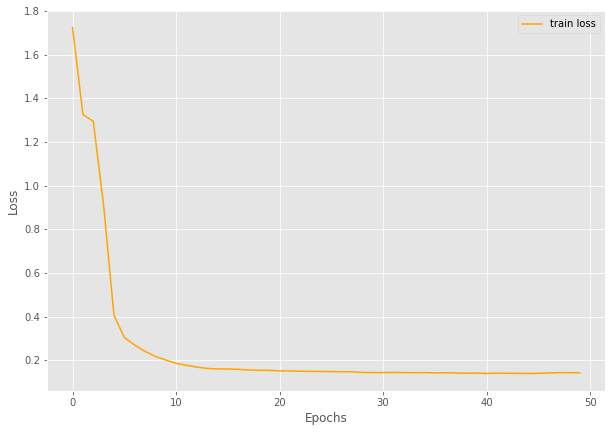

In [ ]:
# plot and save the train loss graph
plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='blue', label='loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('outputs/multi_head_binary_loss.png')
plt.show()

In [ ]:
##### This is for inference_multi_head_binary.py file #####

# from dataset import make_dataset, BinaryDataset
from torch.utils.data import DataLoader
# from models import MultiHeadBinaryModel
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
bin_test_dataset = BinaryDataset(x_test, y_test)
test_dataloader = DataLoader(bin_test_dataset, shuffle=False, batch_size=1)

# prepare the trained model
model = MultiHeadBinaryModel()
model.load_state_dict(torch.load('outputs/multi_head_binary.pth'))
model.to(device)
model.eval()

correct_pred = 0
for i, test_sample in enumerate(test_dataloader):
    print(f"SAMPLE {i}")
    # extract the features and labels
    features = test_sample['features'].to(device)
    target1 = test_sample['toxic'].to(device)
    target2 = test_sample['severe_toxic'].to(device)
    target3 = test_sample['obscene'].to(device)
    target4 = test_sample['threat'].to(device)
    target5 = test_sample['insult'].to(device)
    target6 = test_sample['identity_hate'].to(device)
    
    outputs = model(features)
            
    # get all the labels
    all_labels = []
    for out in outputs:
        if out >= 0.5:
            all_labels.append(1)
        else:
            all_labels.append(0)
    
    targets = (target1, target2, target3, target4, target5, target6)
    
    # get all the targets in int format from tensor format
    all_targets = []
    for target in targets:
        all_targets.append(int(target.squeeze(0).detach().cpu()))
    
    if all_labels == all_targets:
        correct_pred += 1
            
    print(f"ALL PREDICTIONS: {all_labels}")
    print(f"GROUND TRUTHS: {all_targets}")

accuracy_score = correct_pred / x_test.shape[0]

print(f'The accuracy of this model is {round(accuracy_score*100)}%')

[INFO]: Number of test samples: 18680
[INFO]: Number of test features: 150
SAMPLE 0
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [0, 0, 0, 0, 0, 0]
SAMPLE 1
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [0, 0, 0, 0, 0, 0]
SAMPLE 2
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [0, 0, 0, 0, 0, 0]
SAMPLE 3
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [0, 0, 0, 0, 0, 0]
SAMPLE 4
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [0, 0, 0, 0, 0, 0]
SAMPLE 5
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [0, 0, 0, 0, 0, 0]
SAMPLE 6
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [0, 0, 0, 0, 0, 0]
SAMPLE 7
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [0, 0, 0, 0, 0, 0]
SAMPLE 8
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [1, 0, 0, 0, 0, 0]
SAMPLE 9
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [0, 0, 0, 0, 0, 0]
SAMPLE 10
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [0, 0, 0, 0, 0, 0]
SAMPLE 11
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TR

/Users/franciscovarelacid/opt/anaconda3/envs/nlpmod/lib/python3.8/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")



ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [0, 0, 0, 0, 0, 0]
SAMPLE 24
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [0, 0, 0, 0, 0, 0]
SAMPLE 25
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [0, 0, 0, 0, 0, 0]
SAMPLE 26
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [1, 0, 1, 0, 1, 1]
SAMPLE 27
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [0, 0, 0, 0, 0, 0]
SAMPLE 28
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [0, 0, 0, 0, 0, 0]
SAMPLE 29
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [0, 0, 0, 0, 0, 0]
SAMPLE 30
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [0, 0, 0, 0, 0, 0]
SAMPLE 31
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [0, 0, 0, 0, 0, 0]
SAMPLE 32
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [0, 0, 0, 0, 0, 0]
SAMPLE 33
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [0, 0, 0, 0, 0, 0]
SAMPLE 34
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [1, 0, 0, 0, 0, 0]
SAMPLE 35
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GRO

In [ ]:
def collate(batch, vectorizer=dataset.vectorizer):
    inputs = torch.stack([torch.stack([vectorizer(token) for token in sentence[0]]) for sentence in batch])
    target = torch.LongTensor([item[1] for item in batch]) # Use long tensor to avoid unwanted rounding
    return inputs, target

In [ ]:
import torch
from collections import Counter
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm, tqdm_notebook

In [ ]:
batch_size = 16
train_loader = DataLoader(dataset, batch_size=batch_size, collate_fn=collate)

In [ ]:
next(iter(train_loader))[0].shape

torch.Size([16, 150, 300])

In [ ]:
from torch import nn
import torch.nn.functional as F
emb_dim = 300
class Classifier(nn.Module):
    def __init__(self, max_seq_len, emb_dim, hidden1=16, hidden2=16):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(max_seq_len*emb_dim, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, 6)
        self.out = nn.LogSoftmax(dim=1)
    
    
    def forward(self, inputs):
        x = F.relu(self.fc1(inputs.squeeze(1).float()))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return self.out(x)

In [ ]:
MAX_SEQ_LEN = 150
model = Classifier(MAX_SEQ_LEN, 300, 75, 16)
model

Classifier(
  (fc1): Linear(in_features=45000, out_features=75, bias=True)
  (fc2): Linear(in_features=75, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=6, bias=True)
  (out): LogSoftmax()
)

In [ ]:
from torch import optim
criterion = nn.NLLLoss()

# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [ ]:
dataiter = iter(train_loader)
sentences, labels = dataiter.next()

In [ ]:
labels

tensor([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [ ]:
# Forward pass through the network
sentence_idx = 0
sentences.resize_(16, 1, MAX_SEQ_LEN*emb_dim).shape
log_ps = model.forward(sentences[sentence_idx,:])

sentence = sentences[sentence_idx]
torch.exp(log_ps)

tensor([[0.1498, 0.1146, 0.1593, 0.2198, 0.1827, 0.1738]],
       grad_fn=<ExpBackward>)